# The Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model by comparing **actual values** vs. **predicted values**.

|               | Predicted: 0 | Predicted: 1 |
|---------------|--------------|--------------|
| **Actual: 0** | TN           | FP           |
| **Actual: 1** | FN           | TP           |

*The figure above displays a confusion matrix for binary classification*

---

## 📊 Parts of a Confusion Matrix

| Term | Also Known As | Definition | Description |
|------|---------------|------------|-------------|
| **True Positive (TP)** | Hits | ✅ Actual = 1, Predicted = 1 | Data says YES, model says YES (Correct) |
| **True Negative (TN)** | Correct Rejections | ✅ Actual = 0, Predicted = 0 | Data says NO, model says NO (Correct) |
| **False Positive (FP)** | False Alarm / Type I Error | ❌ Actual = 0, Predicted = 1 | Data says NO, model says YES (Wrong) |
| **False Negative (FN)** | Miss / Type II Error | ❌ Actual = 1, Predicted = 0 | Data says YES, model says NO (Wrong) |

### 🐟 Creating a Confusion Matrix Using Seaborn

> Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification  # creating a demo data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

> Create a Dummy Dataset and Train-Test Split

In [2]:
X, y = make_classification(n_samples=10000, n_classes=2, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

> Create a Model and Confusion Matrix

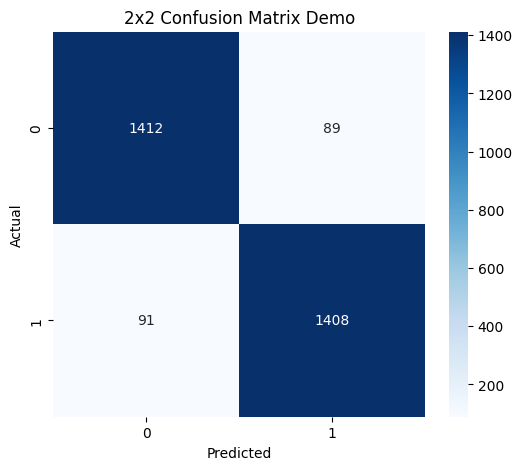

True Positive: 1408
True Negative: 1412
False Positive: 89
False Negative: 91


In [3]:
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("2x2 Confusion Matrix Demo")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Positive: {tp}")
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")

# Accuracy

**Accuracy** is the overall proportion of correct predictions made by the model out of all predictions made. It is represented by the formula below:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:
- $TP$ = True Positives (correctly predicted positives)
- $TN$ = True Negatives (correctly predicted negatives)
- $FP$ = False Positives (Type I Errors)
- $FN$ = False Negatives (Type II Errors)

---

## Example

Given the confusion matrix:

|               | Predicted: 0 | Predicted: 1 |
|---------------|--------------|--------------|
| **Actual: 0** | TN = 70      | FP = 5       |
| **Actual: 1** | FN = 10      | TP = 15      |

$$
\begin{aligned}
\text{Accuracy} &= \frac{15 + 70}{15 + 70 + 5 + 10} \\
&= \frac{85}{100} \\
&= 0.85 \text{ or } 85\%
\end{aligned}
$$

---

## Intuitive Understanding

| Component | What it Represents |
|-----------|-------------------|
| **Numerator** (TP + TN) | ✅ **All correct predictions** (both positives and negatives) |
| **Denominator** (TP + TN + FP + FN) | 📊 **All predictions made** (the entire dataset) |

---

## ✅ When Accuracy is a Good Metric

Accuracy works well when:
- **Balanced classes** (similar number of 0s and 1s)
- **Equal error costs** (FP and FN are equally costly)
- **Simple benchmark** needed for model comparison

---

## ⚠️ When High Accuracy is Bad

### 1. Class Imbalance

**Scenario:** Fraud Detection (only 1% of transactions are fraudulent)

A model that predicts "NOT FRAUD" for EVERY transaction:

|               | Predicted: No | Predicted: Yes |
|---------------|---------------|----------------|
| **Actual: No**    | TN = 9,900    | FP = 0         |
| **Actual: Yes**   | FN = 100      | TP = 0         |

$$
\text{Accuracy} = \frac{9,900 + 0}{9,900 + 0 + 0 + 100} = \frac{9,900}{10,000} = 99\%
$$

**The Problem:** This model catches **ZERO** fraudulent transactions

**Real-world examples:**
- Disease screening (rare conditions)
- Fraud detection
- Churn prediction
- Manufacturing defects

---

### 2. Unequal Error Costs

| Scenario | Cost of FP | Cost of FN |
|----------|------------|------------|
| Cancer Screening | Patient anxiety | Death |
| Spam Detection | Lost email | Inbox clutter |
| Self-driving Car | Unnecessary brake | Accident |

Standard Accuracy treats all errors equally:

$$
\text{Accuracy} = \frac{TP + TN}{Total}
$$

But in reality:

$$
\text{Total Cost} = (FP \times \text{Cost}_{FP}) + (FN \times \text{Cost}_{FN})
$$

---

### 3. The Accuracy Paradox

**Dataset:** 95% Class 0, 5% Class 1

**Strategy A** (Always predict 0):
$$
\text{Accuracy} = 95\%
$$

**Strategy B** (Try to find Class 1):
Even at 80% recall on Class 1:
$$
\text{Accuracy} = (0.95 \times 1.0 + 0.05 \times 0.8) = 95\%
$$

The model gets punished for trying to find the minority class

---

### 4. When You Care About One Class

| If you care about... | Accuracy hides... |
|---------------------|-------------------|
| Finding ALL positives (high recall) | How many positives were missed (FN) |
| Being sure when you predict positive (high precision) | How many false alarms (FP) |
| Rare event detection | Complete failure on the rare class |

---

## 🔍 The Detection Test

Ask these questions to know if high accuracy is lying to you:

- [ ] Is my data balanced? (Check class distribution)
- [ ] Are error costs equal? (FP cost = FN cost?)
- [ ] Do I care about both classes equally?
- [ ] Did I check the confusion matrix?
- [ ] Did I calculate per-class metrics (precision/recall)?

---

## 📊 What to Do Instead

### Always Report These Alongside Accuracy:

- **Confusion Matrix** - See exactly where errors occur
- **Precision & Recall** - Understand performance per class
- **F1 Score** - Harmonic mean of precision & recall
- **ROC-AUC** - Performance across all thresholds
- **Class-wise Accuracy** - Accuracy on Class 0 vs Class 1

---

### Better Metrics for Imbalanced Data:

| Metric | Formula | When to Use |
|--------|---------|-------------|
| Balanced Accuracy | $\frac{1}{2}\left(\frac{TP}{P} + \frac{TN}{N}\right)$ | Imbalanced classes |
| F1 Score | $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$ | When you care about positives |
| Precision-Recall AUC | Area under PR curve | Rare event detection |
| Cohen's Kappa | $\frac{p_o - p_e}{1 - p_e}$ | Chance-corrected agreement |

---

## ✅ Summary Checklist

**High accuracy is BAD when:**

□ Dataset is imbalanced (>90% one class)  
□ False negatives are expensive  
□ False positives are expensive  
□ You only care about one class  
□ Model always predicts majority class  
□ Confusion matrix shows poor minority class performance  
□ Business metrics disagree with accuracy  

---

## 🎯 The Golden Rule

> **"Accuracy tells you how often you're right, but not about what, when, or at what cost."**

Always dig deeper than accuracy alone

---

## 📝 Key Takeaway

> **Accuracy tells you how often you're right overall, but not *what kind* of mistakes you're making.**

Always pair accuracy with:
- Confusion matrix inspection
- Precision & recall
- Domain knowledge about error costs

---

## ⚡ Quick Reference

```python
# Formula
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Interpretation
if accuracy is high:
    print("Model gets most predictions right")
else:
    print("Model struggles to predict correctly")
    
# But remember...
if high_accuracy and imbalanced_data:
    print("🚩 RED FLAG 🚩 - Investigate further!")

### Accuracy Demo

> Get Accuracy (Manually)

In [4]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.94


> Get Accuracy (sklearn)

In [5]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print("ACCURACY METRIC")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy (%): {accuracy*100:.2f}%")

ACCURACY METRIC
Accuracy: 0.9400
Accuracy (%): 94.00%


# Precision

**Precision** answers the question: *"Of all the positive predictions we made, how many were actually correct?"*

It focuses on the **trustworthiness** of positive predictions.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Where:
- $TP$ = True Positives (correctly predicted positives)
- $FP$ = False Positives (Type I Errors)

---

## Example

Given the confusion matrix:

|               | Predicted: 0 | Predicted: 1 |
|---------------|--------------|--------------|
| **Actual: 0** | TN = 70      | FP = 5       |
| **Actual: 1** | FN = 10      | TP = 15      |

$$
\begin{aligned}
\text{Precision} &= \frac{15}{15 + 5} \\
&= \frac{15}{20} \\
&= 0.75 \text{ or } 75\%
\end{aligned}
$$

**Interpretation:** When the model predicts positive, it is correct 75% of the time.

---

## Intuitive Understanding

| Component | What it Represents |
|-----------|-------------------|
| **Numerator** (TP) | ✅ Correct positive predictions |
| **Denominator** (TP + FP) | 🎯 **All positive predictions made** |

$$
\text{Precision} = \frac{\text{Correct Positives}}{\text{All Positives Predicted}}
$$

---

## ✅ When Precision is the Right Metric

Precision is important when:
- **False Positives are costly** (crying wolf is expensive)
- You need to be **sure** before taking action
- The cost of acting on a wrong positive is high

### Real-world Examples:

| Scenario | Why Precision Matters |
|----------|----------------------|
| **Spam Detection** | Marking real email as spam (FP) loses important messages |
| **Drug Testing** | False positive could ruin someone's career |
| **Quality Control** | Rejecting good products (FP) wastes money |
| **Medical Testing** | False positive causes unnecessary anxiety and procedures |

---

## 🔍 Precision vs. Other Metrics

| If you want to know... | Use this |
|------------------------|----------|
| "Should I trust a positive prediction?" | **Precision** |
| "Did I find all the positives?" | Recall |
| "Overall, how am I doing?" | Accuracy |
| "Balance between precision and recall?" | F1 Score |

---

## ⚠️ The Precision Trap

High precision doesn't mean high recall:
- Model that makes only ONE positive prediction (and gets it right):
- Precision = 1/1 = 100% (perfect!)
- Recall = 1/100 = 1% (terrible!)

### Precision Demo

> Get Precision (Manually)

In [6]:
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")

Precision: 0.9405


> Get Precision (sklearn)

In [7]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("="*50)
print("PRECISION METRIC")
print("="*50)
print(f"Precision: {precision:.4f}")
print(f"Precision (%): {precision*100:.2f}%")

PRECISION METRIC
Precision: 0.9405
Precision (%): 94.05%


# Recall

**Recall** (also called **Sensitivity** or **True Positive Rate**) answers the question: *"Of all the actual positives, how many did we catch?"*

It focuses on **completeness** of positive predictions.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Where:
- $TP$ = True Positives (correctly predicted positives)
- $FN$ = False Negatives (Type II Errors)

---

## Example

Given the confusion matrix:

|               | Predicted: 0 | Predicted: 1 |
|---------------|--------------|--------------|
| **Actual: 0** | TN = 70      | FP = 5       |
| **Actual: 1** | FN = 10      | TP = 15      |

$$
\begin{aligned}
\text{Recall} &= \frac{15}{15 + 10} \\
&= \frac{15}{25} \\
&= 0.60 \text{ or } 60\%
\end{aligned}
$$

**Interpretation:** The model caught 60% of all actual positives.

---

## Intuitive Understanding

| Component | What it Represents |
|-----------|-------------------|
| **Numerator** (TP) | ✅ Correct positive predictions |
| **Denominator** (TP + FN) | 🎯 **All actual positives in the data** |

$$
\text{Recall} = \frac{\text{Correct Positives}}{\text{All Actual Positives}}
$$

---

## ✅ When Recall is the Right Metric

Recall is important when:
- **False Negatives are costly** (missing something is dangerous)
- You need to **catch as many positives** as possible
- The cost of missing a positive is high

### Real-world Examples:

| Scenario | Why Recall Matters |
|----------|-------------------|
| **Cancer Screening** | Missing a cancer patient (FN) could be fatal |
| **Fraud Detection** | Missing a fraudulent transaction costs money |
| **Terrorist Threat** | Missing a threat has catastrophic consequences |
| **Machine Failure** | Missing warning signs causes breakdowns |

---

## 🔍 Recall vs. Other Metrics

| If you want to know... | Use this |
|------------------------|----------|
| "Did I catch all the positives?" | **Recall** |
| "Should I trust a positive prediction?" | Precision |
| "Overall, how am I doing?" | Accuracy |
| "Balance between precision and recall?" | F1 Score |

---

## ⚠️ The Recall Trap

High recall doesn't mean high precision:
- Model that predicts EVERYTHING as positive:
- Recall = 100/100 = 100% (perfect!)
- Precision = 100/1000 = 10% (terrible!)

### Recall Demo

> Get Recall (Manually)

In [8]:
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")

Recall: 0.9393


> Get Recall (sklearn)

In [9]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("="*50)
print("RECALL METRIC (Sensitivity)")
print("="*50)
print(f"Recall: {recall:.4f}")
print(f"Recall (%): {recall*100:.2f}%")

RECALL METRIC (Sensitivity)
Recall: 0.9393
Recall (%): 93.93%


### F1 Demo

> Get F1 (Manually)

In [11]:
f1 = 2 * ((precision * recall) / (precision + recall))
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9399


In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("="*50)
print("F1-SCORE METRIC")
print("="*50)
print(f"F1-Score: {f1:.4f}")
print(f"F1-Score (%): {f1*100:.2f}%")

F1-SCORE METRIC
F1-Score: 0.9399
F1-Score (%): 93.99%


# F1 Score

**F1 Score** is the **harmonic mean** of Precision and Recall. It provides a single score that balances both concerns.

---

## Harmonic Mean Formula

$$
\text{Harmonic Mean} = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + \cdots + \frac{1}{x_n}}
$$

---

## Derivation of F1 Score

### Step 1: The Harmonic Mean Formula

The harmonic mean of two numbers $a$ and $b$ is defined as:

$$
\text{Harmonic Mean} = \frac{2}{\frac{1}{a} + \frac{1}{b}}
$$

Unlike the arithmetic mean, the harmonic mean penalizes extreme values more severely.

---

### Step 2: Apply to Precision and Recall

Let $P$ = Precision and $R$ = Recall. Substituting into the harmonic mean formula:

$$
F_1 = \frac{2}{\frac{1}{P} + \frac{1}{R}}
$$

---

### Step 3: Simplify the Denominator

Find a common denominator for $\frac{1}{P} + \frac{1}{R}$:

$$
\frac{1}{P} + \frac{1}{R} = \frac{R}{P \times R} + \frac{P}{P \times R} = \frac{P + R}{P \times R}
$$

---

### Step 4: Substitute Back

$$
F_1 = \frac{2}{\frac{P + R}{P \times R}}
$$

---

### Step 5: Simplify the Complex Fraction

Dividing by a fraction is the same as multiplying by its reciprocal:

$$
F_1 = 2 \times \frac{P \times R}{P + R}
$$

---

### Step 6: Final Formula

$$
F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## Why Harmonic Mean?

Harmonic mean penalizes extreme values more than arithmetic mean:

| Model | Precision | Recall | Arithmetic Mean | **F1 Score (Harmonic)** |
|-------|-----------|--------|-----------------|------------------------|
| A | 100% | 100% | 100% | **100%** |
| B | 100% | 0% | 50% | **0%** |
| C | 80% | 80% | 80% | **80%** |

**F1 is 0 if either precision or recall is 0** - it forces balance!

---

## Example

Using our previous calculations:
- Precision = 0.75 (75%)
- Recall = 0.60 (60%)

$$
\begin{aligned}
F_1 &= 2 \times \frac{0.75 \times 0.60}{0.75 + 0.60} \\
&= 2 \times \frac{0.45}{1.35} \\
&= 2 \times 0.333 \\
&= 0.667 \text{ or } 66.7\%
\end{aligned}
$$

---

## Intuitive Understanding

| Score | Meaning |
|-------|---------|
| **F1 = 1.0** | Perfect precision and recall |
| **F1 > 0.8** | Strong balance between precision and recall |
| **F1 ~ 0.5** | Mediocre performance |
| **F1 = 0** | Either precision or recall is zero |

---

## ✅ When F1 is the Right Metric

F1 is important when:
- You need a **single number** to compare models
- You care about **both precision and recall**
- You have **imbalanced classes**
- You want to **balance** false positives and false negatives

---

## The Precision-Recall Trade-off
                ┌─────────────────┐
                │   Perfect       │
                │   Model         │
                └─────────────────┘
                        ↑
                ┌─────────────────┐
                │    F1 Score     │
                │  (Balances both)│
                └─────────────────┘
                ↙                 ↘
        ┌─────────┐           ┌─────────┐
        │Precision│           │ Recall  │
        │  (Trust)│           │(Catch all)│
        └─────────┘           └─────────┘


**You can't always have both:**
- Increasing threshold ↑ Precision ↓ Recall
- Decreasing threshold ↓ Precision ↑ Recall

---

## Quick Comparison Table

| Metric | Formula | Asks | Best For |
|--------|---------|------|----------|
| **Precision** | $\frac{TP}{TP + FP}$ | "Should I trust positive predictions?" | When FP are costly |
| **Recall** | $\frac{TP}{TP + FN}$ | "Did I catch all positives?" | When FN are costly |
| **F1 Score** | $2 \times \frac{P \times R}{P + R}$ | "Balance both?" | Imbalanced data |
| **Accuracy** | $\frac{TP + TN}{TP + TN + FP + FN}$ | "Overall correctness?" | Balanced classes |

---

## Summary Checklist

### Use Precision When:
□ False Positives are expensive  
□ You need certainty before acting  
□ The cost of being wrong is high  

### Use Recall When:
□ False Negatives are expensive  
□ Missing a positive is dangerous  
□ You need to catch everything  

### Use F1 When:
□ You need a balanced metric  
□ Classes are imbalanced  
□ You want one number for comparison  

---

## The Golden Rule

> **"Precision says 'trust me', Recall says 'I got you', F1 says 'let's be reasonable'."**

Choose based on what failure costs more! 🎯